![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [8]:
# Create a DataFrame where results must be at least 80% and sorted by average_math in descending order
best_math_schools = schools[schools['average_math'] >= 640][['school_name', 'average_math']].sort_values(by='average_math', ascending=False)

schools["total_SAT"] = schools['average_math'] + schools['average_reading'] + schools['average_writing']

top_10_schools = schools.sort_values(by='total_SAT', ascending=False)[['school_name', 'total_SAT']].head(10)
top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


In [3]:
boroughs = schools.groupby('borough')['total_SAT'].agg(['count', 'mean', 'std']).round(2)

largest_std_dev = boroughs[boroughs['std'] == boroughs['std'].max()]
largest_std_dev = largest_std_dev.rename(columns={'count':'num_schools', 'mean':'average_SAT', 'std':'std_SAT'})

print(largest_std_dev)

           num_schools  average_SAT  std_SAT
borough                                     
Manhattan           89      1340.13   230.29


# Summary
<h> In this summary of data for high schools in NYC, we can see that:
- Stuyvesant High School is the school with the highest average cumulative score of SAT
- Manhattan borough has a great standard of score outputs with a mean of 1340.13 and standard deviation of 230.29

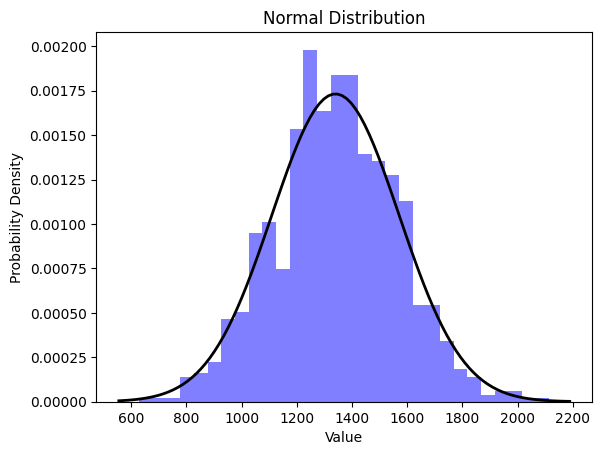

In [13]:
data = np.random.normal(1340.13, 230.29, 1000)
# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.5, color='b')

# Plot the probability density function (PDF)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - 1340.13) / 230.29) ** 2) / (230.29 * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)

# Add labels and a title
plt.title('Normal Distribution of SAT scores in Manhattan Borough')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Show the plot
plt.show()